
<div class="alert alert-block alert-info"><font size="5"><center><b><u>Tasca 7 : Transformació Registre Log amb Regular expressions</u></b></center></font>
\begin{align*}Marc\:Breysse\end{align*}

<span style=color:blue>*L'anàlisi de registres és una funció important per al control i l'alerta, el compliment de les polítiques de seguretat, l'auditoria i el compliment normatiu, la resposta a incidents de seguretat i fins i tot les investigacions forenses. En analitzar les dades de registre, les empreses poden identificar més fàcilment les possibles amenaces i altres problemes, trobar la causa arrel i iniciar una resposta ràpida per mitigar els riscos*.</span>

# <span style=color:darkblue>Nivell 1</span>

<span style=color:blue>*L'analista ha d'assegurar-se que els registres consisteixen en una gamma completa de missatges i s'interpreten segons el context. Els elements de registre han de normalitzar-se, utilitzant els mateixos termes o terminologia, per evitar confusions i proporcionar cohesió. Com Científic de Dades se t'ha proporcionat accés als registres-Logs on queda registrada l'activitat de totes les visites a realitzades a la pàgina web de l'agència de viatges "akumenius.com".*.</span>

### <span style=color:green> Al final del notebook, está un metodo REGEX para extraer columnas de una. Sin embargo, aqui está una mezcla de split y extract con Regex </span>

#### <span style=color:green><ins>Ficheros log: Información que suele tener un archivo Log</ins></span>
    Ficheros log: Toda la información de registro en un archivo
    https://www.ionos.es/digitalguide/online-marketing/analisis-web/el-log-el-archivo-de-registro-de-procesos-informaticos/

<u style=color:blue>Exercici 1:</u>

<span style=color:blue>Normalitza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import re

 ### 1. IMPORT CSV

In [2]:
#pd.read_csv('Web_access_log-akumenius.com.txt', sep='delimiter', header=None, engine='python')

WebLogAk = pd.read_csv('Web_access_log-akumenius.com.txt', header=None, sep='\t', encoding='utf-8')

In [3]:
WebLogAk.shape

(261873, 1)

In [4]:
WebLogAk.columns

Int64Index([0], dtype='int64')

In [5]:
WebLogAk.head()

,0
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...


In [6]:
WebLogAk.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       261873 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


 ### 2. ELIMINATE DUPLICATED ROWS: 4563 de 261873
https://serverfault.com/questions/187588/stop-apache-from-writing-duplicate-log-entries-into-access-log puede ser un tema de configuración del servidor. Entiendo que es buena idea borrarlos.

In [7]:
len(WebLogAk.drop_duplicates())

257310

In [8]:
WebLogAk.drop_duplicates(keep="last",inplace=True) 
WebLogAk.shape
# Cuidado: " WebLogAk.drop_duplicates(keep=False,inplace=True) " will exclude all duplicated values w/o keeping al least 1. 

(257310, 1)

In [9]:
WebLogAk.head(5)

,0
21,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
22,www.akumenius.com 66.249.76.216 - - [23/Feb/20...
23,www.akumenius.com 66.249.76.216 - - [23/Feb/20...
24,www.akumenius.com 66.249.76.216 - - [23/Feb/20...
25,www.akumenius.com 66.249.76.216 - - [23/Feb/20...


 ### 3. SPLIT UNIQUE COLUMN THROUGH CARACTER " TO GET ALL COLUMNS 

In [10]:
WebLogAk = WebLogAk[0].str.split("\"",expand=True,)
WebLogAk.shape

(257310, 9)

In [11]:
WebLogAk.head(3)

,0,1,2,3,4,5,6,7,8
21,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,OPTIONS * HTTP/1.0,200 -,-,,Apache (internal dummy connection),VLOG=-,None,None
22,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,GET /hoteles-baratos/ofertas-hotel-Club-&-Hote...,404 3100,-,,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-,None,None
23,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,GET /hoteles-baratos/ofertas-hotel-Metropolis-...,404 3100,-,,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-,None,None


 ### 4. CREATE COLUMN 'Akumenius_Web' & 'Ip' con SPLIT & separador 'space'

### <span style=color:blue><ins>Ojo que 0 es el index de la columna 0...sin comas </ins></span>

In [12]:
WebLogAk['Ak_Web'] = WebLogAk[0].str.split(' ',2).str[0]
WebLogAk['Ip'] = WebLogAk[0].str.split(' ',2).str[1]
#WebLogAk['Ak_Web'], WebLogAk['Ip'], WebLogAk['1'] = WebLogAk[0].str.split(' ',2).str
WebLogAk.head(5)

,0,1,2,3,4,5,6,7,8,Ak_Web,Ip
21,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,OPTIONS * HTTP/1.0,200 -,-,,Apache (internal dummy connection),VLOG=-,None,None,localhost,127.0.0.1
22,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,GET /hoteles-baratos/ofertas-hotel-Club-&-Hote...,404 3100,-,,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-,None,None,www.akumenius.com,66.249.76.216
23,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,GET /hoteles-baratos/ofertas-hotel-Metropolis-...,404 3100,-,,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-,None,None,www.akumenius.com,66.249.76.216
24,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,GET /hoteles-baratos/ofertas-hotel-Faena-Hotel...,404 3100,-,,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-,None,None,www.akumenius.com,66.249.76.216
25,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,GET /hoteles-baratos/ofertas-hotel-Kensington-...,404 3100,-,,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-,None,None,www.akumenius.com,66.249.76.216


In [13]:
WebLogAk.shape

(257310, 11)

 ### 5. CREATE COLUMN 'Date_Time' con EXTRACT

In [14]:
WebLogAk['Date_Time'] = WebLogAk[0].str.extract(pat = '(\[[^z]*\])')
WebLogAk.head(1)

    #  (" -> empieza a capturar algo que empieza por "
    #  [^"] -> captura todo lo que no sea el carácter "...en este caso con el carácter z
    #  * -> 0 o más veces
    #  ") -> termina de capturar algo que tiene " como último carácter

# WORKS ALSO!!
    #WebLogAk['Date_Time'] = WebLogAk[0].str.extract(pat = '(\[23/Feb/2014...............\])')
    #WebLogAk['Date_Time'] = WebLogAk[0].str.extract(pat = '(\[23[^"]*\])')

,0,1,2,3,4,5,6,7,8,Ak_Web,Ip,Date_Time
21,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,OPTIONS * HTTP/1.0,200 -,-,,Apache (internal dummy connection),VLOG=-,None,None,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100]


In [15]:
val = WebLogAk['Date_Time'].values[21]             #To get dataframe cell value with row index and column name
print(val)

[23/Feb/2014:03:11:03 +0100]


 ### <span style=color:green><ins> To remove corchetes</ins></span>

In [16]:
WebLogAk['Date_Time'] = WebLogAk['Date_Time'].str.replace('\]','').str.replace('\[','')
WebLogAk.head(1)

,0,1,2,3,4,5,6,7,8,Ak_Web,Ip,Date_Time
21,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,OPTIONS * HTTP/1.0,200 -,-,,Apache (internal dummy connection),VLOG=-,None,None,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100


### 6. CREATE COLUMN 'REQUEST CONFIRMATION' & 'TRANSFERED DATA' FROM COLUMN '2' con SPLIT

### <span style=color:green><ins> Confirmación de la solicitud (Código de estado HTTP) </ins></span>
    https://www.ionos.es/digitalguide/hosting/cuestiones-tecnicas/una-mirada-a-los-codigos-de-estado-http-mas-comunes/

In [17]:
WebLogAk['Status'] = WebLogAk[2].str.split(' ',2).str[1]
WebLogAk['Size'] = WebLogAk[2].str.split(' ',2).str[2]
#WebLogAk.loc[[2687], :]
WebLogAk[2687:2689]

,0,1,2,3,4,5,6,7,8,Ak_Web,Ip,Date_Time,Status,Size
2708,www.akumenius.com 157.55.35.43 - - [23/Feb/201...,GET /hoteles-baratos/ofertas-hotel-Intercontin...,404 3100,-,,Mozilla/5.0 (compatible; bingbot/2.0; +http://...,VLOG=-,None,None,www.akumenius.com,157.55.35.43,23/Feb/2014:04:10:43 +0100,404,3100
2709,www.akumenius.com 162.243.192.191 - - [23/Feb/...,GET /escapadas/escapada-romantica-macia-gran-v...,200 5440,http://www.akumenius.com/escapadas/granada-513...,,Mozilla/5.0 (compatible; spbot/4.0.7; +http://...,VLOG=-,None,None,www.akumenius.com,162.243.192.191,23/Feb/2014:04:10:47 +0100,200,5440


 ### 6. REMOVE COLUMN '0' & '2'

In [18]:
WebLogAk.drop([0,2], axis=1, inplace=True)
WebLogAk.head()

,1,3,4,5,6,7,8,Ak_Web,Ip,Date_Time,Status,Size
21,OPTIONS * HTTP/1.0,-,,Apache (internal dummy connection),VLOG=-,None,None,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,200,-
22,GET /hoteles-baratos/ofertas-hotel-Club-&-Hote...,-,,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-,None,None,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:31 +0100,404,3100
23,GET /hoteles-baratos/ofertas-hotel-Metropolis-...,-,,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-,None,None,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:33 +0100,404,3100
24,GET /hoteles-baratos/ofertas-hotel-Faena-Hotel...,-,,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-,None,None,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:35 +0100,404,3100
25,GET /hoteles-baratos/ofertas-hotel-Kensington-...,-,,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-,None,None,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:38 +0100,404,3100


### 7. REORDER COLUMNS

In [19]:
WebLogAk = WebLogAk[['Ak_Web', 'Ip','Date_Time',1,'Status','Size',3,4,5,6,7,8]]
WebLogAk.loc[[29870], :]

,Ak_Web,Ip,Date_Time,1,Status,Size,3,4,5,6,7,8
29870,www.akumenius.com,84.79.190.7,23/Feb/2014:19:27:18 +0100,GET /libraries/jqueryui/css/ui-lightness/jquer...,200,1140,http://www.akumenius.com/hotel-list,,Mozilla/5.0 (Windows NT 5.1; rv:27.0) Gecko/20...,VLOG=-,None,None


### 8. RENAME COLUMNS

In [20]:
WebLogAk.columns = ['Ak_Web', 'Ip','Date_Time','Request','Status','Size','Referer','TBC1','User_Agent','VLOG','TBC2','TBC3']
WebLogAk.loc[[192524], :]

,Ak_Web,Ip,Date_Time,Request,Status,Size,Referer,TBC1,User_Agent,VLOG,TBC2,TBC3
192524,www.akumenius.com,195.57.124.71,27/Feb/2014:12:12:12 +0100,GET /modules/raton/views/themes/bcoos/images/b...,304,-,http://www.akumenius.com/hoteles-baratos/hotel...,,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,VLOG=-,None,None


 ### 9. CHECK CONTENT OF 'TBC1', 'TBC2', 'TBC3', 

In [21]:
WebLogAk['TBC1'].unique()         # Buscar valores unicos

array([' ', ' 200 3100 '], dtype=object)

In [22]:
WebLogAk['TBC1'].nunique()     # number of unique values

2

In [23]:
WebLogAk[WebLogAk['TBC1'] == ' 200 3100 ']
occurence_TBC1 = WebLogAk['TBC1'].value_counts()[' 200 3100 ']         # occurence of valuesin column
print(occurence_TBC1)

2


In [24]:
WebLogAk.loc[WebLogAk['TBC1'] == ' 200 3100 ']         # rows whose column value is equal to

,Ak_Web,Ip,Date_Time,Request,Status,Size,Referer,TBC1,User_Agent,VLOG,TBC2,TBC3
181473,www.akumenius.com,5.10.83.41,26/Feb/2014:23:44:22 +0100,GET /escapadas/escapada-especial-san-valentin-\,NaN,NaN,-en-playa-de-san-juan-hotel-castilla-alicante-...,200 3100,-,,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...,VLOG=-
236496,www.akumenius.com,5.10.83.11,28/Feb/2014:16:07:20 +0100,GET /escapadas/escapada-\,NaN,NaN,-observatorio-avifauna-hotel-pedro-i-de-aragon...,200 3100,-,,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...,VLOG=-


 ### <span style=color:green><ins> To move data of column 181473 & 236496 to right column </ins></span>

In [25]:
WebLogAk.loc[(181473,236496),'Status']='200'
WebLogAk.loc[(181473,236496),'Size']='3100'
WebLogAk.loc[[181473,236496], :]

,Ak_Web,Ip,Date_Time,Request,Status,Size,Referer,TBC1,User_Agent,VLOG,TBC2,TBC3
181473,www.akumenius.com,5.10.83.41,26/Feb/2014:23:44:22 +0100,GET /escapadas/escapada-especial-san-valentin-\,200,3100,-en-playa-de-san-juan-hotel-castilla-alicante-...,200 3100,-,,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...,VLOG=-
236496,www.akumenius.com,5.10.83.11,28/Feb/2014:16:07:20 +0100,GET /escapadas/escapada-\,200,3100,-observatorio-avifauna-hotel-pedro-i-de-aragon...,200 3100,-,,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...,VLOG=-


In [26]:
WebLogAk['TBC2'].unique() 

array([None,
       'Mozilla/5.0 (compatible; AhrefsBot/5.0; +http://ahrefs.com/robot/)'],
      dtype=object)

In [27]:
WebLogAk.loc[WebLogAk['TBC2'] == 'Mozilla/5.0 (compatible; AhrefsBot/5.0; +http://ahrefs.com/robot/)']

,Ak_Web,Ip,Date_Time,Request,Status,Size,Referer,TBC1,User_Agent,VLOG,TBC2,TBC3
181473,www.akumenius.com,5.10.83.41,26/Feb/2014:23:44:22 +0100,GET /escapadas/escapada-especial-san-valentin-\,200,3100,-en-playa-de-san-juan-hotel-castilla-alicante-...,200 3100,-,,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...,VLOG=-
236496,www.akumenius.com,5.10.83.11,28/Feb/2014:16:07:20 +0100,GET /escapadas/escapada-\,200,3100,-observatorio-avifauna-hotel-pedro-i-de-aragon...,200 3100,-,,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...,VLOG=-


In [28]:
WebLogAk.loc[(181473,236496),'User_Agent']='Mozilla/5.0 (compatible; AhrefsBot/5.0; +http://ahrefs.com/robot/)'
WebLogAk.loc[[181473,236496], :]

,Ak_Web,Ip,Date_Time,Request,Status,Size,Referer,TBC1,User_Agent,VLOG,TBC2,TBC3
181473,www.akumenius.com,5.10.83.41,26/Feb/2014:23:44:22 +0100,GET /escapadas/escapada-especial-san-valentin-\,200,3100,-en-playa-de-san-juan-hotel-castilla-alicante-...,200 3100,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...,,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...,VLOG=-
236496,www.akumenius.com,5.10.83.11,28/Feb/2014:16:07:20 +0100,GET /escapadas/escapada-\,200,3100,-observatorio-avifauna-hotel-pedro-i-de-aragon...,200 3100,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...,,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...,VLOG=-


In [29]:
WebLogAk['TBC3'].unique() 

array([None, ' VLOG=-'], dtype=object)

In [30]:
WebLogAk.loc[WebLogAk['TBC3'] == ' VLOG=-']  

,Ak_Web,Ip,Date_Time,Request,Status,Size,Referer,TBC1,User_Agent,VLOG,TBC2,TBC3
181473,www.akumenius.com,5.10.83.41,26/Feb/2014:23:44:22 +0100,GET /escapadas/escapada-especial-san-valentin-\,200,3100,-en-playa-de-san-juan-hotel-castilla-alicante-...,200 3100,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...,,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...,VLOG=-
236496,www.akumenius.com,5.10.83.11,28/Feb/2014:16:07:20 +0100,GET /escapadas/escapada-\,200,3100,-observatorio-avifauna-hotel-pedro-i-de-aragon...,200 3100,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...,,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...,VLOG=-


In [31]:
WebLogAk.loc[(181473,236496),'VLOG']='VLOG=-'
WebLogAk.loc[[181473,236496], :]

,Ak_Web,Ip,Date_Time,Request,Status,Size,Referer,TBC1,User_Agent,VLOG,TBC2,TBC3
181473,www.akumenius.com,5.10.83.41,26/Feb/2014:23:44:22 +0100,GET /escapadas/escapada-especial-san-valentin-\,200,3100,-en-playa-de-san-juan-hotel-castilla-alicante-...,200 3100,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...,VLOG=-,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...,VLOG=-
236496,www.akumenius.com,5.10.83.11,28/Feb/2014:16:07:20 +0100,GET /escapadas/escapada-\,200,3100,-observatorio-avifauna-hotel-pedro-i-de-aragon...,200 3100,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...,VLOG=-,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...,VLOG=-


 ### <span style=color:green><ins> Drop 'TBC1, TBC2, TBC3'  </ins></span>

In [32]:
WebLogAk.drop(['TBC1','TBC2','TBC3','VLOG'], axis=1, inplace=True)
WebLogAk.loc[[21,21,23,181473,236496], :]

,Ak_Web,Ip,Date_Time,Request,Status,Size,Referer,User_Agent
21,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection)
21,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection)
23,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:33 +0100,GET /hoteles-baratos/ofertas-hotel-Metropolis-...,404,3100,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
181473,www.akumenius.com,5.10.83.41,26/Feb/2014:23:44:22 +0100,GET /escapadas/escapada-especial-san-valentin-\,200,3100,-en-playa-de-san-juan-hotel-castilla-alicante-...,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...
236496,www.akumenius.com,5.10.83.11,28/Feb/2014:16:07:20 +0100,GET /escapadas/escapada-\,200,3100,-observatorio-avifauna-hotel-pedro-i-de-aragon...,Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...


 ### 10. SAVE CSV file

In [33]:
WebLogAk.to_csv(r'C:\Users\mio\Documents\IT ACADEMY\5.7_Altres mòduls bàsics de Python\WebLogAk_Normalized.csv', index = False)

### <span style=color:green><ins> Methods to save to_csv()  o to_excel() </ins></span>
Tomas, esto lo parametrizas, con el metodo to_csv()  o to_excel(), echadle un vistazo a los argumentos. por ejemplo crear un lista de las variables a guardar.!!
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html?highlight=to_excel#pandas.DataFrame.to_excel
https://www.analyticslane.com/2018/06/15/guardar-y-leer-archivos-csv-con-python/

# <span style=color:darkblue>Nivell 2</span>

<u style=color:blue>Exercici 2:</u>

<span style=color:blue>Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web..</span>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import re
import seaborn as sns

In [35]:
#pd.read_csv('Web_access_log-akumenius.com.txt', sep='delimiter', header=None, engine='python')

WebLogAkN = pd.read_csv('WebLogAk_Normalized.csv')
WebLogAkN.head(2)

,Ak_Web,Ip,Date_Time,Request,Status,Size,Referer,User_Agent
0,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection)
1,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:31 +0100,GET /hoteles-baratos/ofertas-hotel-Club-&-Hote...,404,3100,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...


### 1. COLUMN 'Date_Time'.......transform to datetime & Plot 'traffic/day'

In [36]:
#INFO: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
WebLogAkN['Date_Time'] =  pd.to_datetime(WebLogAkN['Date_Time'], format='%d/%b/%Y:%H:%M:%S %z')
WebLogAkN.head(1)

,Ak_Web,Ip,Date_Time,Request,Status,Size,Referer,User_Agent
0,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection)


In [37]:
WebLogAkN.dtypes

Ak_Web                                      object
Ip                                          object
Date_Time     datetime64[ns, pytz.FixedOffset(60)]
Request                                     object
Status                                       int64
Size                                        object
Referer                                     object
User_Agent                                  object
dtype: object

In [38]:
# Extraer el nombre del dia de la semana numerico
WebLogAkN['Day'] = WebLogAkN.Date_Time.dt.date
WebLogAkN['Day_Name']=WebLogAkN.Date_Time.dt.day_name()
# return day name in french...........df.dt.day_name(locale = 'French')
WebLogAkN.head(3)

,Ak_Web,Ip,Date_Time,Request,Status,Size,Referer,User_Agent,Day,Day_Name
0,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),2014-02-23,Sunday
1,www.akumenius.com,66.249.76.216,2014-02-23 03:10:31+01:00,GET /hoteles-baratos/ofertas-hotel-Club-&-Hote...,404,3100,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,2014-02-23,Sunday
2,www.akumenius.com,66.249.76.216,2014-02-23 03:10:33+01:00,GET /hoteles-baratos/ofertas-hotel-Metropolis-...,404,3100,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,2014-02-23,Sunday


### <span style=color:green><ins> Count & sort 'Day's traffic' </ins></span>

#### <span style=color:blue><ins> Value_counts() tricks that make your work more efficient </ins></span>

https://re-thought.com/pandas-value_counts/

In [39]:
Day_Count = WebLogAkN['Day'].value_counts().sort_index(ascending=True)
Day_Count.head()

2014-02-23    40235
2014-02-24    47408
2014-02-25    54963
2014-02-26    35643
2014-02-27    40905
Name: Day, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2014-02-23'),
  Text(0, 1, '2014-02-24'),
  Text(0, 2, '2014-02-25'),
  Text(0, 3, '2014-02-26'),
  Text(0, 4, '2014-02-27'),
  Text(0, 5, '2014-02-28'),
  Text(0, 6, '2014-03-01'),
  Text(0, 7, '2014-03-02')])

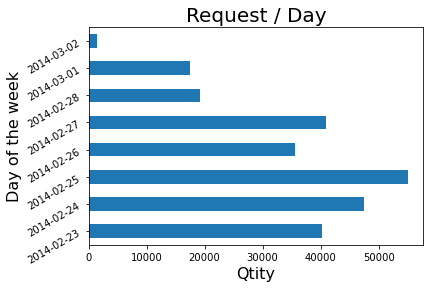

In [40]:
Day_Count.plot(kind="barh")
plt.title("Request / Day",fontsize=20)
plt.xlabel("Qtity", fontsize=16)
plt.ylabel("Day of the week", fontsize=16)
plt.yticks(rotation=30)

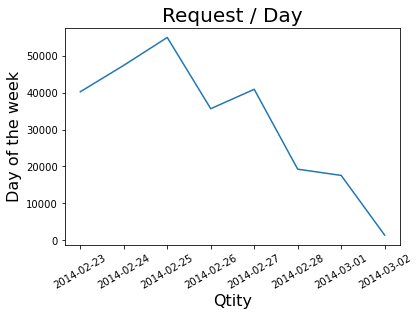

In [41]:
Day_Count.plot()
plt.title("Request / Day",fontsize=20)
plt.xlabel("Qtity", fontsize=16)
plt.ylabel("Day of the week", fontsize=16)
plt.xticks(rotation=30)
plt.show()

### 2. COLUMN 'Request'

Python’s Requests Library (Guide) – Real Python

https://realpython.com/python-requests/
    
https://realpython.com/python-requests/#other-http-methods
    

 ### 3. COLUMN 'Status'..........Number of good and failed transmissions.........Group & Plot 

##### <span style=color:green><ins> Confirmación de la solicitud (Código de estado HTTP) </ins></span>
    https://www.ionos.es/digitalguide/hosting/cuestiones-tecnicas/una-mirada-a-los-codigos-de-estado-http-mas-comunes/

### <span style=color:green><ins> Group and Count 'Total of Errors 2xx, 3xx..' </ins></span>

In [42]:
# Data from Str to Int
WebLogAkN['Status']= WebLogAkN['Status'].astype(str).astype(int)

#### <span style=color:blue><ins> Groupby and Sum Only One Column and several </ins></span>

https://stackoverflow.com/questions/38985053/pandas-groupby-and-sum-only-one-column

In [43]:
WebLogAkN['Status'].unique()

array([200, 404, 304, 502, 301, 403, 408, 400, 206, 401, 302, 500])

In [44]:
ranges = [0,299,399,499,599]
WebLogAkN_St=WebLogAkN.groupby(pd.cut(WebLogAkN.Status, ranges)).count()
WebLogAkN_St

,Ak_Web,Ip,Date_Time,Request,Status,Size,Referer,User_Agent,Day,Day_Name
Status,,,,,,,,,,
"(0, 299]",222380,222380,222380,222380,222380,222380,222380,222380,222380,222380
"(299, 399]",26016,26016,26016,26016,26016,26016,26016,26016,26016,26016
"(399, 499]",8867,8867,8867,8867,8867,8867,8867,8867,8867,8867
"(499, 599]",47,47,47,47,47,47,47,47,47,47


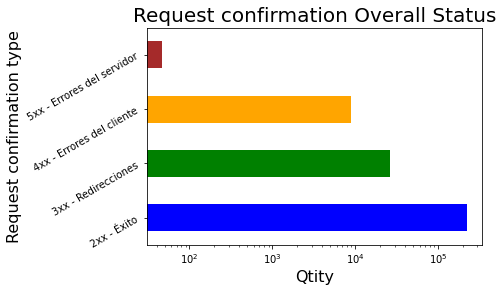

In [45]:
WebLogAkN_St['Status'].plot(kind="barh", color=['blue', 'green', 'orange', 'brown'])
plt.title("Request confirmation Overall Status",fontsize=20)
plt.xlabel("Qtity", fontsize=16)
plt.ylabel("Request confirmation type", fontsize=16)
plt.yticks([0, 1, 2,3], ['2xx - Éxito', '3xx - Redirecciones', '4xx - Errores del cliente','5xx - Errores del servidor'],
           rotation=30)
plt.xscale("log")

### <span style=color:green><ins> Count and sort 'Total of Errors 2xx, 3xx..' per Day </ins></span>

In [46]:
WebLogAkN.head(1)

,Ak_Web,Ip,Date_Time,Request,Status,Size,Referer,User_Agent,Day,Day_Name
0,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),2014-02-23,Sunday


#### <span style=color:blue><ins> How to groupby based on two columns </ins></span>

https://stackoverflow.com/questions/43222137/how-to-groupby-based-on-two-columns-in-pandas

In [47]:
WebLogAkN.groupby('Day')['Status'].value_counts().sort_index(ascending=True).head()
# https://re-thought.com/pandas-value_counts/

Day         Status
2014-02-23  200       33762
            206           9
            301          80
            304         330
            400           1
Name: Status, dtype: int64

#### <span style=color:green><ins> How to select and sum with SUM (without GROUPBY) </ins></span>

In [48]:
WebLogAkN_StDay=WebLogAkN[['Day','Status']].value_counts().to_frame().sort_index(ascending=True)
WebLogAkN_StDay.head(5)
# https://re-thought.com/pandas-value_counts/

0
Day        Status       
2014-02-23 200     33762
           206         9
           301        80
           304       330
           400         1

#### <span style=color:blue><ins> To reset Index and get all data with column names </ins></span>

In [49]:
WebLogAkN_StDay=WebLogAkN[['Day','Status']].value_counts().to_frame().sort_index(ascending=True).reset_index()
WebLogAkN_StDay.head(5)

# See also df.set_index() & df.rename_axis(index=['visit_date'])

,Day,Status,0
0,2014-02-23,200,33762
1,2014-02-23,206,9
2,2014-02-23,301,80
3,2014-02-23,304,330
4,2014-02-23,400,1


#### <span style=color:green><ins> How to plot with double index.....first pivot dataframe in order to get index as columns </ins></span>

https://stackoverflow.com/questions/48151629/plotting-pandas-multi-index-dataframe-with-one-index-as-y-axis-and-other-as-x-ax

In [50]:
WebLogAkN_StDayP = WebLogAkN_StDay.reset_index().pivot('Day','Status',0)
# can be plotted directly.....WebLogAkN_StDay.reset_index().pivot('Day','Status',0).plot(kind='bar',stacked=True, title='Req_Conf Qtity over the days', grid=True, figsize=(12,6))
WebLogAkN_StDayP

Status,200,206,301,302,304,400,401,403,404,408,500,502
Day,,,,,,,,,,,,
2014-02-23,33762.0,9.0,80.0,NaN,330.0,1.0,NaN,3.0,6036.0,3.0,NaN,11.0
2014-02-24,41166.0,86.0,108.0,15.0,3731.0,8.0,1.0,18.0,2257.0,10.0,1.0,7.0
2014-02-25,52241.0,89.0,101.0,60.0,2245.0,4.0,1.0,22.0,189.0,4.0,NaN,7.0
2014-02-26,32679.0,12.0,130.0,7.0,2684.0,2.0,1.0,53.0,65.0,3.0,2.0,5.0
2014-02-27,27362.0,23.0,115.0,22.0,13299.0,4.0,1.0,12.0,52.0,7.0,NaN,8.0
2014-02-28,17379.0,79.0,238.0,3.0,1486.0,1.0,1.0,32.0,21.0,NaN,NaN,2.0
2014-03-01,16182.0,3.0,85.0,2.0,1229.0,6.0,NaN,37.0,6.0,NaN,NaN,4.0
2014-03-02,1305.0,3.0,12.0,NaN,34.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN


### <span style=color:green><ins> Matplotlib </ins></span>

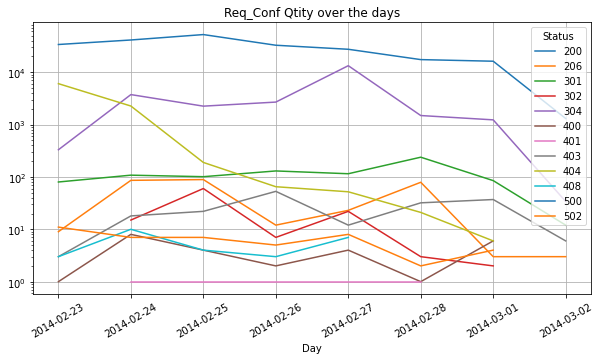

In [ ]:
WebLogAkN_StDayP.plot(title='Req_Conf Qtity over the days', grid=True, figsize=(10,5))
plt.xticks(rotation=30)
plt.yscale("log")
WebLogAkN_StDayP.plot(kind='bar',title='Req_Conf Qtity over the days', grid=True, figsize=(12,6))
plt.xticks(rotation=30)
plt.yscale("log")
WebLogAkN_StDayP.plot(kind='bar',stacked=True, title='Req_Conf Qtity over the days', grid=True, figsize=(12,6))
plt.xticks(rotation=30)
WebLogAkN_StDayP.plot(kind='area',title='Req_Conf Qtity over the days', grid=True, figsize=(12,6))
plt.xticks(rotation=30)
plt.legend(fontsize=12)

### <span style=color:green><ins> Seaborn </ins></span>

In [ ]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=30)
sns.lineplot(data=WebLogAkN_StDayP)
plt.yscale("log")
#https://seaborn.pydata.org/generated/seaborn.lineplot.html

### 4. COLUMN 'Size'.......tranform to integer & groupby/count data

In [ ]:
WebLogAkN['Size'].nunique() 

In [ ]:
WebLogAkN['Size'].unique() 

In [ ]:
WebLogAkN['Size'] = WebLogAkN['Size'].replace(['- '],'0')     #https://datatofish.com/replace-values-pandas-dataframe/

In [ ]:
WebLogAkN['Size'].unique() 

In [ ]:
WebLogAkN['Size']= WebLogAkN['Size'].astype(str).astype(int)

In [ ]:
WebLogAkN.dtypes

In [ ]:
ranges = [0,5000,10000,25000,50000,100000,175000,300000]
W3=WebLogAkN.groupby(pd.cut(WebLogAkN.Size, ranges)).count()
W3

In [ ]:
W3['Size'].plot(kind="barh", color=['blue', 'green', 'orange', 'brown'])
plt.title("Data Size Request",fontsize=20)
plt.xlabel("Qtity", fontsize=16)
plt.ylabel("Data Size", fontsize=16)
plt.yticks([0, 1, 2,3,4,5,6], ['0, 5000', '5000, 10000', '10000, 25000','25000, 50000', '50000, 100000','100000, 175000','175000, 300000'],
           rotation=30)

In [ ]:
WebLogAkN['Size'].value_counts()[WebLogAkN['Size'].value_counts() > 100000]

### 5. Referer & 6. User_Agent

Paquetes https://github.com/thinkwelltwd/device_detector o https://github.com/ua-parser/uap-python para sacar información. Hacerlo directamente parseando el user_agent puede ser demasiado engorroso

Según he leído para localizar le User-agent de cada uno de los logs, no sería necesario trabajar toda la cadena que lo identifica. Sería solo necesario capturar aquellas partes invariables y que identifican inequívocamente al Firefox, Chrome..
Firefox debería localizar “Gecko/20100101” “Firefox/”+ versión
Chrome localitzar  “ KHTML like Gecko”  y “Safari”
Etc. Seria suficiente?
Fuente User-Agent - HTTP | MDN (mozilla.org)
https://developer.mozilla.org/es/docs/Web/HTTP/Headers/User-Agent

https://developer.mozilla.org/en-US/docs/Web/HTTP/Browser_detection_using_the_user_agent
https://github.com/selwin/python-user-agents

Entiendo que es suficiente, aunque depende de lo que busques. Por ejemplo, si quieres mostrar el sistema operativo, o si es un dispositivo móvil, o buscar los bots. Las librerías también ayudan a evitar reinventar la rueda.

Estoy viendo lo de los exploradores usados por cada user_agent. Hay algunos que tienen más de uno incluido. Por ej Safari y Chrome
es normal? Será una cuestión de complementos entre ambos?
Julio Abril - Data Science02/03/2021
https://discordapp.com/channels/773911471271706634/789420852600766465/813820156500246568

<span style=color:blue><u style=color:blue>Exercici 3:</u>

<span style=color:blue>Geolocalitza les IP's. Aqui tens una pagina de interes :IP2Locattion: https://blog.ip2location.com/knowledge-base/how-to-add-a-sub-account-in-ip2location/.</span>.</span>

 ### <span style=color:green><ins> To install Geoip  </ins></span>
https://pythonhosted.org/python-geoip/         
https://stackoverflow.com/questions/54940411/typeerror-a-bytes-like-object-is-required-not-str-in-geolite2-function-in-py   
https://pypi.org/project/python-geoip-python3/   
https://pypi.org/project/maxminddb-geolite2/               
https://dev.maxmind.com/geoip/geoip2/geolite2/ 

In [ ]:
import geoip
from geoip import geolite2
#from geoip import open_database
#https://stackoverflow.com/questions/54940411/typeerror-a-bytes-like-object-is-required-not-str-in-geolite2-function-in-py
geolite2.lookup('66.249.76.216')

In [ ]:
# https://stackoverflow.com/questions/40211314/pandas-fastest-way-to-resolve-ip-to-country
from geolite2 import geolite2
def get_country(ip):
    try:
        x = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return x['country']['names']['en'] if x else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()

unique_ips = WebLogAkN['Ip'].unique()
unique_ips = pd.Series(unique_ips, index = unique_ips)
WebLogAkN['country'] = WebLogAkN['Ip'].map(unique_ips.apply(get_country))

geolite2.close()

In [ ]:
WebLogAkN.loc[[21,100,500], :]

 ### <span style=color:green><ins> Groupby and plot IP on a world map  </ins></span>

In [ ]:
WebLogAkN['country'].unique()

In [ ]:
Country_Count = WebLogAkN['country'].value_counts()
Country_Count.head()

In [ ]:
plt.subplot(1, 3, 1)
Country_Count.iloc[0:17].plot.bar(figsize=(15, 4))
plt.yscale("log")
plt.ylabel("Qtity")
plt.subplot(1, 3, 2)
Country_Count.iloc[17:34].plot.bar(figsize=(15, 4))
plt.subplot(1, 3, 3)
plt.xlabel("Country")
Country_Count.iloc[34:50].plot.bar(figsize=(15, 4))
plt.suptitle("TOTAL REQUESTS / COUNTRY")

# <span style=color:darkblue>INFO ADICIONAL </span>

# <span style=color:blue><ins> TO GET ALL COLUMNS AT ONCE FOM LOG 'TXT' WITH ONE REGEX </ins></span>

# Original code in
#https://mmas.github.io/read-apache-access-log-pandas     

\s                           # Match space 

(?=(?:[^"]*"[^"]*")*[^"]*$)  # Not surrounded by ".    

(?![^\[]*\])                 # Not surrounded by [].   

\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])

In [ ]:
import datetime
import pytz
import pandas as pd
import numpy as np
from datetime import datetime
import pytz
import re


In [ ]:
def parse_str(x):
    return x[1:-1]
    """
    Returns the string delimited by two characters.

    Example:
        >>> parse_str('[my string]')
        'my string'
    """
    #return x[1:-1]

#def parse_datetime(x):
    '''
    Parses datetime with timezone formatted as:
        [day/month/year:hour:minute:second zone]

    Example:
        >>> parse_datetime('13/Nov/2015:11:45:42 +0000')
        datetime.datetime(2015, 11, 3, 11, 45, 4, tzinfo=<UTC>)

    Due to problems parsing the timezone (%z) with datetime.strptime, the
    timezone will be obtained using the pytz library.
    '''
def parse_datetime(x):
    dt = datetime.strptime(x[1:-7], '%d/%b/%Y:%H:%M:%S')
    dt_tz = int(x[-6:-3])*60+int(x[-3:-1])
    return dt.replace(tzinfo=pytz.FixedOffset(dt_tz))


data = pd.read_csv(
    'Web_access_log-akumenius.com.txt',
    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
    engine='python',
    na_values='-',
    header=None,
    usecols=[1, 4, 5, 6, 7, 8, 9],
    names=['ip', 'date', 'request', 'status', 'size', 'referer', 'user_agent'],
    converters={'date': parse_datetime,
               'request': parse_str,
               'status': int,
               'size': int,
               'referer': parse_str})
data.head()

# <span style=color:blue><ins> MULTIPLE EXTRACT TO GET COLUMNS </ins></span>

In [ ]:
#pd.read_csv('Web_access_log-akumenius.com.txt', sep='delimiter', header=None, engine='python')

WebLogAk = pd.read_csv('Web_access_log-akumenius.com.txt', header=None, sep='\t', encoding='utf-8')
WebLogAk.head()

### <span style=color:blue><ins> TO EXTRACT 'IP' </ins></span>
EXTRACT / EXTRACTALL

In [ ]:
WebLogAk['IP'] = WebLogAk[0].str.extract(pat = '(\d+.\d+.\d+.\d+)')
WebLogAk.head(1)

### <span style=color:blue><ins> TO EXTRACT 'DATE_TIME'  </ins></span>

In [ ]:
WebLogAk['Date_Time'] = WebLogAk[0].str.extract(pat = '(\[[^z]*\])')
WebLogAk.head(1)

#### <span style=color:blue> Clean corchetes  </ins></span>

### <span style=color:blue><ins> TO EXTRACT 'REQUEST' </ins></span>

In [ ]:
# String entre']' y 'HTTP/1.'
WebLogAk['Request'] = WebLogAk[0].str.extract(pat = '(\][^z]*HTTP/1..)')
#WebLogAk[150:152]
WebLogAk.head(1)
# Using iloc, loc, & ix to select rows and columns.........https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

In [ ]:
WebLogAk['Request'].values[12] 

In [ ]:
WebLogAk['Request'].values[150]

#### <span style=color:blue> Clean corchetes  </ins></span>

### <span style=color:blue><ins> TO EXTRACT 'STATUS & SIZE' </ins></span>

#### <span style=color:blue> Clean corchetes  </ins></span>

Regex to confirm -> entre HTTP/1.. and "-"

In [ ]:
WebLogAk['Status & Size'] = WebLogAk[0].str.extract(pat = '(HTTP/1[^z]*"-")')
#WebLogAk[150:152]
WebLogAk.head(1)